<a href="https://colab.research.google.com/github/FrancoMauricio777/proyecto_integrado-2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Artes", "Música", "Informática", "Filosofía", "Sociología"
]

# Función para generar un nombre y apellido aleatorio
def generar_nombre_apellido():
  nombres = ["Juan", "Pedro", "Maria", "Ana", "Luis", "Laura", "Carlos", "Sofia", "Diego", "Valentina"]
  apellidos = ["Gómez", "Rodríguez", "Pérez", "López", "García", "Martínez", "Fernández", "González", "Díaz", "Sánchez"]
  return random.choice(nombres) + " " + random.choice(apellidos)

# Generar datos para 100 filas
datos = []
for i in range(100):
  nombre_apellido = generar_nombre_apellido()
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota_1er_trimestre = random.randint(1, 10)
  nota_2do_trimestre = random.randint(1, 10)
  nota_3er_trimestre = random.randint(1, 10)
  faltas = random.randint(0, 20)
  datos.append([nombre_apellido, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])


# Crear el DataFrame
df = pd.DataFrame(datos, columns=["Nombre y Apellido", "Nro DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Mostrar el DataFrame
df

,Nombre y Apellido,Nro DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Carlos López,84071569,Informática,1,7,5,8
1,Juan González,17642419,Ciencias Naturales,8,1,7,10
2,Maria González,14630898,Informática,7,2,7,15
3,Sofia López,36768152,Educación Física,1,9,2,8
4,Ana Pérez,64387058,Ciencias Naturales,5,8,8,14
...,...,...,...,...,...,...,...
95,Diego Pérez,11420812,Lengua y Literatura,9,7,7,12
96,Juan Fernández,97338625,Historia,10,9,6,6
97,Laura Pérez,10901403,Ciencias Naturales,6,3,3,6
98,Pedro Martínez,65697675,Informática,3,4,1,7


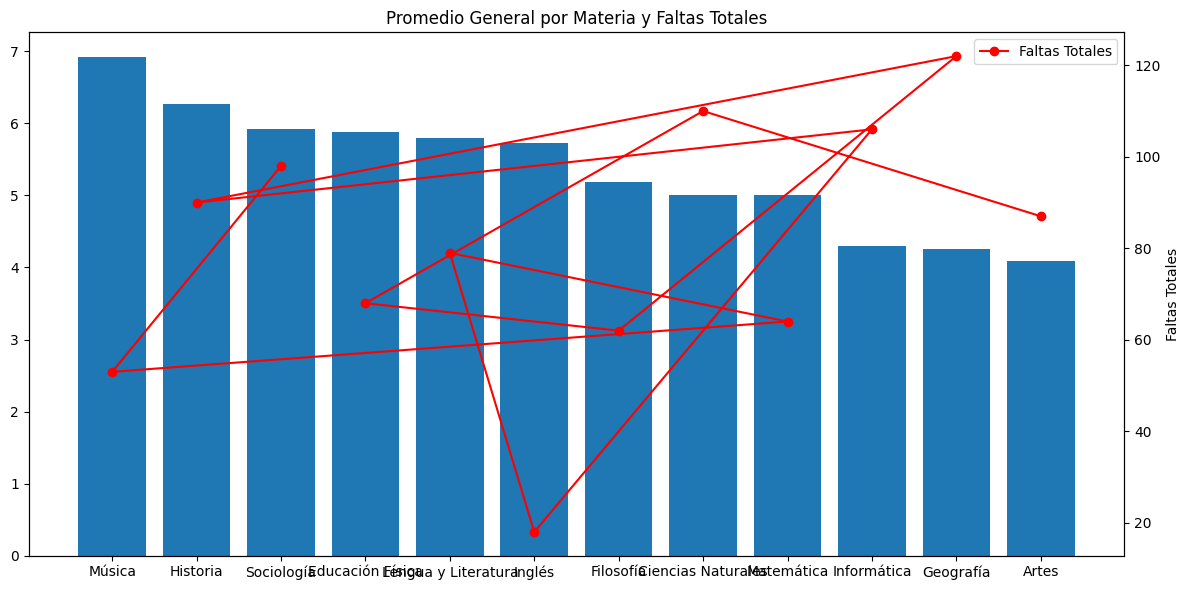

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constatable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio general de mayor a menor
promedio_por_materia_ordenado = promedio_por_materia.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras con el promedio general de cada materia
plt.figure(figsize=(12, 6))
ax1 = plt.bar(promedio_por_materia_ordenado.index, promedio_por_materia_ordenado.values)

# Crear el segundo eje Y para las faltas
ax2 = plt.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o', label='Faltas Totales')

# Agregar leyendas y títulos
plt.title('Promedio General por Materia y Faltas Totales')
plt.xlabel('Materias')
plt.ylabel('Promedio General')
ax2.set_ylabel('Faltas Totales')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X para mejor visualización
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [6]:
df.to_csv("datos_alumnos.csv", index=False)